# 1. Linear Regression

- 작성자: [JWarmenhoven's Exercise 1](https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("white")

1. prepare

In [10]:
def computeCost(X, y, theta = [[0], [0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h - y))
    return(J)

In [17]:
def gradientDescent(X, y, theta = [[0], [0]], alpha = 0.01, num_iters = 1500):
    m = y.size
    J_stack = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h - y))
        J_stack[iter] = computeCost(X, y, theta)
    return(theta, J_stack)

## Linear regression

In [4]:
data = np.loadtxt("https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/tree/master/notebooks/data/ex1data1.txt", delimiter=',')
data[1:5, data.shape[1] - 1]

array([ 9.1302, 13.662 , 11.854 ,  6.8233])

In [9]:
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

데이터 형태 파악

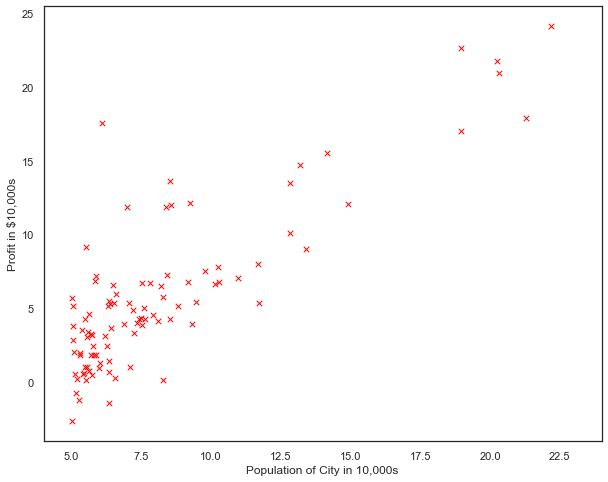

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 1], y, s = 30, c = 'r', marker = 'x', linewidths = 1)
plt.xlim(4, 24)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### Gradient Descent
- 경사하강법과 GLM(in sklearn) 비교

In [12]:
computeCost(X, y)

32.072733877455676

In [37]:
theta, Cost_j = gradientDescent(X, y)
print("theta:", theta.ravel())

theta: [-3.63029144  1.16636235]


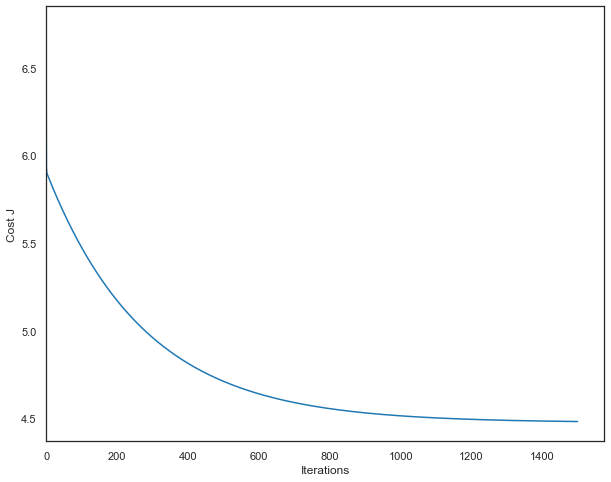

In [25]:
plt.figure(figsize = (10, 8))
plt.plot(Cost_j)
plt.ylabel("Cost J")
plt.xlim(0)
plt.xlabel("Iterations")
plt.show()

이제 정말 비교해보자.

In [38]:
xx = np.arange(5, 23)
yy = theta[0] + theta[1] * xx

In [39]:
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())

LinearRegression()

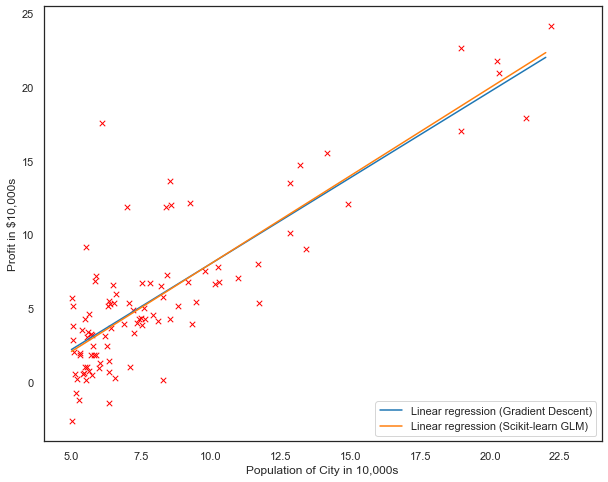

In [43]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 1], y, s = 30, c = 'r', marker = 'x', linewidths = 1)
plt.plot(xx, yy, label = "Linear regression (Gradient Descent)")

plt.plot(xx, regr.intercept_ + regr.coef_ * xx,
    label = "Linear regression (Scikit-learn GLM)")

plt.xlim(4, 24)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(loc = 4)
plt.show()

prediction profit for a city with population of 35000 and 70000

In [45]:
print(theta.T.dot([1, 3.5]) * 10000)
print(theta.T.dot([1, 7]) * 10000)

[4519.7678677]
[45342.45012945]


In [47]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing = "xy")

In [48]:
Z = np.zeros((B0.size, B1.size))
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X, y, theta = [[xx[i, j]], [yy[i, j]]])

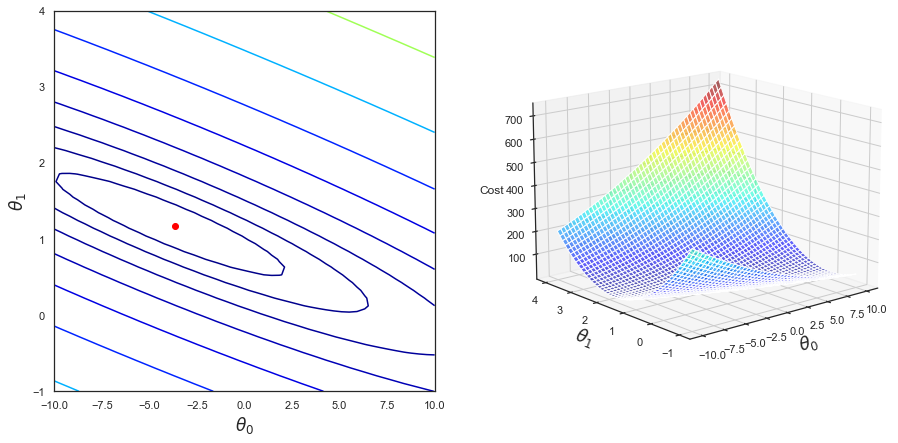

In [53]:
fig = plt.figure(figsize = (15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection = "3d")

CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap = plt.cm.jet)
ax1.scatter(theta[0], theta[1], c = 'r')

ax2.plot_surface(xx, yy, Z, rstride = 1, cstride = 1, alpha = 0.6, cmap = plt.cm.jet)
ax2.set_zlabel("Cost")
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev = 15, azim = 230)

for ax in fig.axes:
    ax.set_xlabel(r"$\theta_0$", fontsize = 17)
    ax.set_ylabel(r"$\theta_1$", fontsize = 17)
plt.show()

왼쪽 그림도 3d로 만들어봤는데, Z가 워낙 dynamic하게 나온 게 아니라서 그걸 연결해놓은 오른쪽과 별반 다르지 않았다. view port는 defaut도 괜찮은 것 같다.